In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\Data Analyst  Assignments  & Project\ML and Stats\VehicleInsuranceData.csv\VehicleInsuranceData.csv")

In [3]:
df.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,4,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,5,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Check for Missing values

<Axes: >

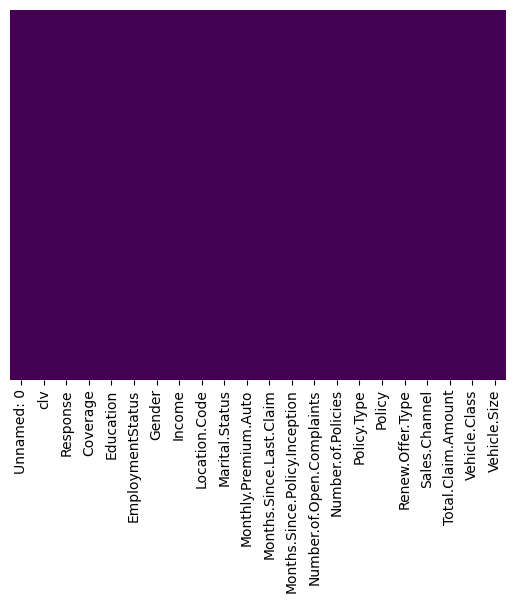

In [4]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

## Check for Outliers

<Axes: >

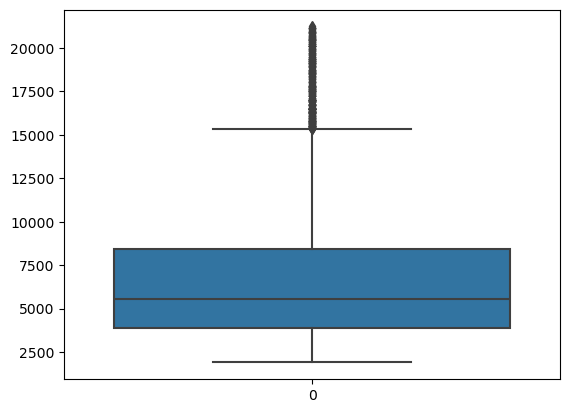

In [5]:
sns.boxplot(df.clv)

In [6]:
df= df[(df.clv>2500) & (df.clv < 15000)]     
# according to boxplot any data below or above, Q1 or Q3 respectively are outliers.

In [7]:
df.shape

(7639, 22)

<Axes: >

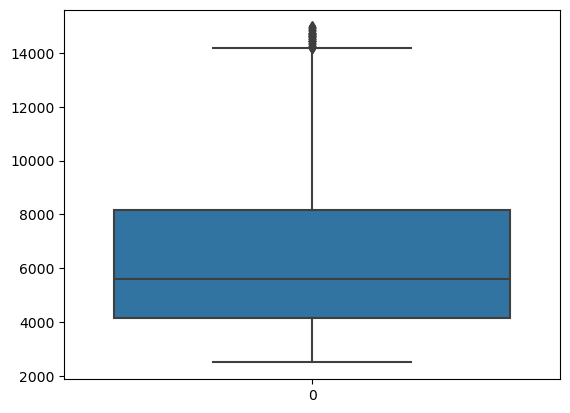

In [8]:
#Removed almost all Outliers
sns.boxplot(df.clv)

## Using Encoder

### To convert categorical features into continuous features. This step is necessary for different statistical tools, transformation and model.

In [9]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if isinstance(df[i][0], str):
            df[i] = encoder.fit_transform(df[i])

In [10]:
df.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,2,6979.535903,0,1,0,4,0,0,1,2,...,42,0,8,1,5,2,0,1131.464935,0,1
2,3,12887.431650,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,4,7645.861827,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,5,2813.692575,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1


## Calculating VIF and Correlation coefficients

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(df)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const                            56.887859
Unnamed: 0                        1.004274
clv                               1.304703
Response                          1.044686
Coverage                          1.284325
Education                         1.005855
EmploymentStatus                  2.229367
Gender                            1.017301
Income                            2.208245
Location.Code                     1.163676
Marital.Status                    1.141383
Monthly.Premium.Auto              2.425323
Months.Since.Last.Claim           1.006818
Months.Since.Policy.Inception     1.013995
Number.of.Open.Complaints         1.005079
Number.of.Policies                1.106330
Policy.Type                       4.409892
Policy                            4.411223
Renew.Offer.Type                  1.111983
Sales.Channel                     1.026581
Total.Claim.Amount                2.457669
Vehicle.Class                     1.064218
Vehicle.Size                      1.020116
dtype: floa

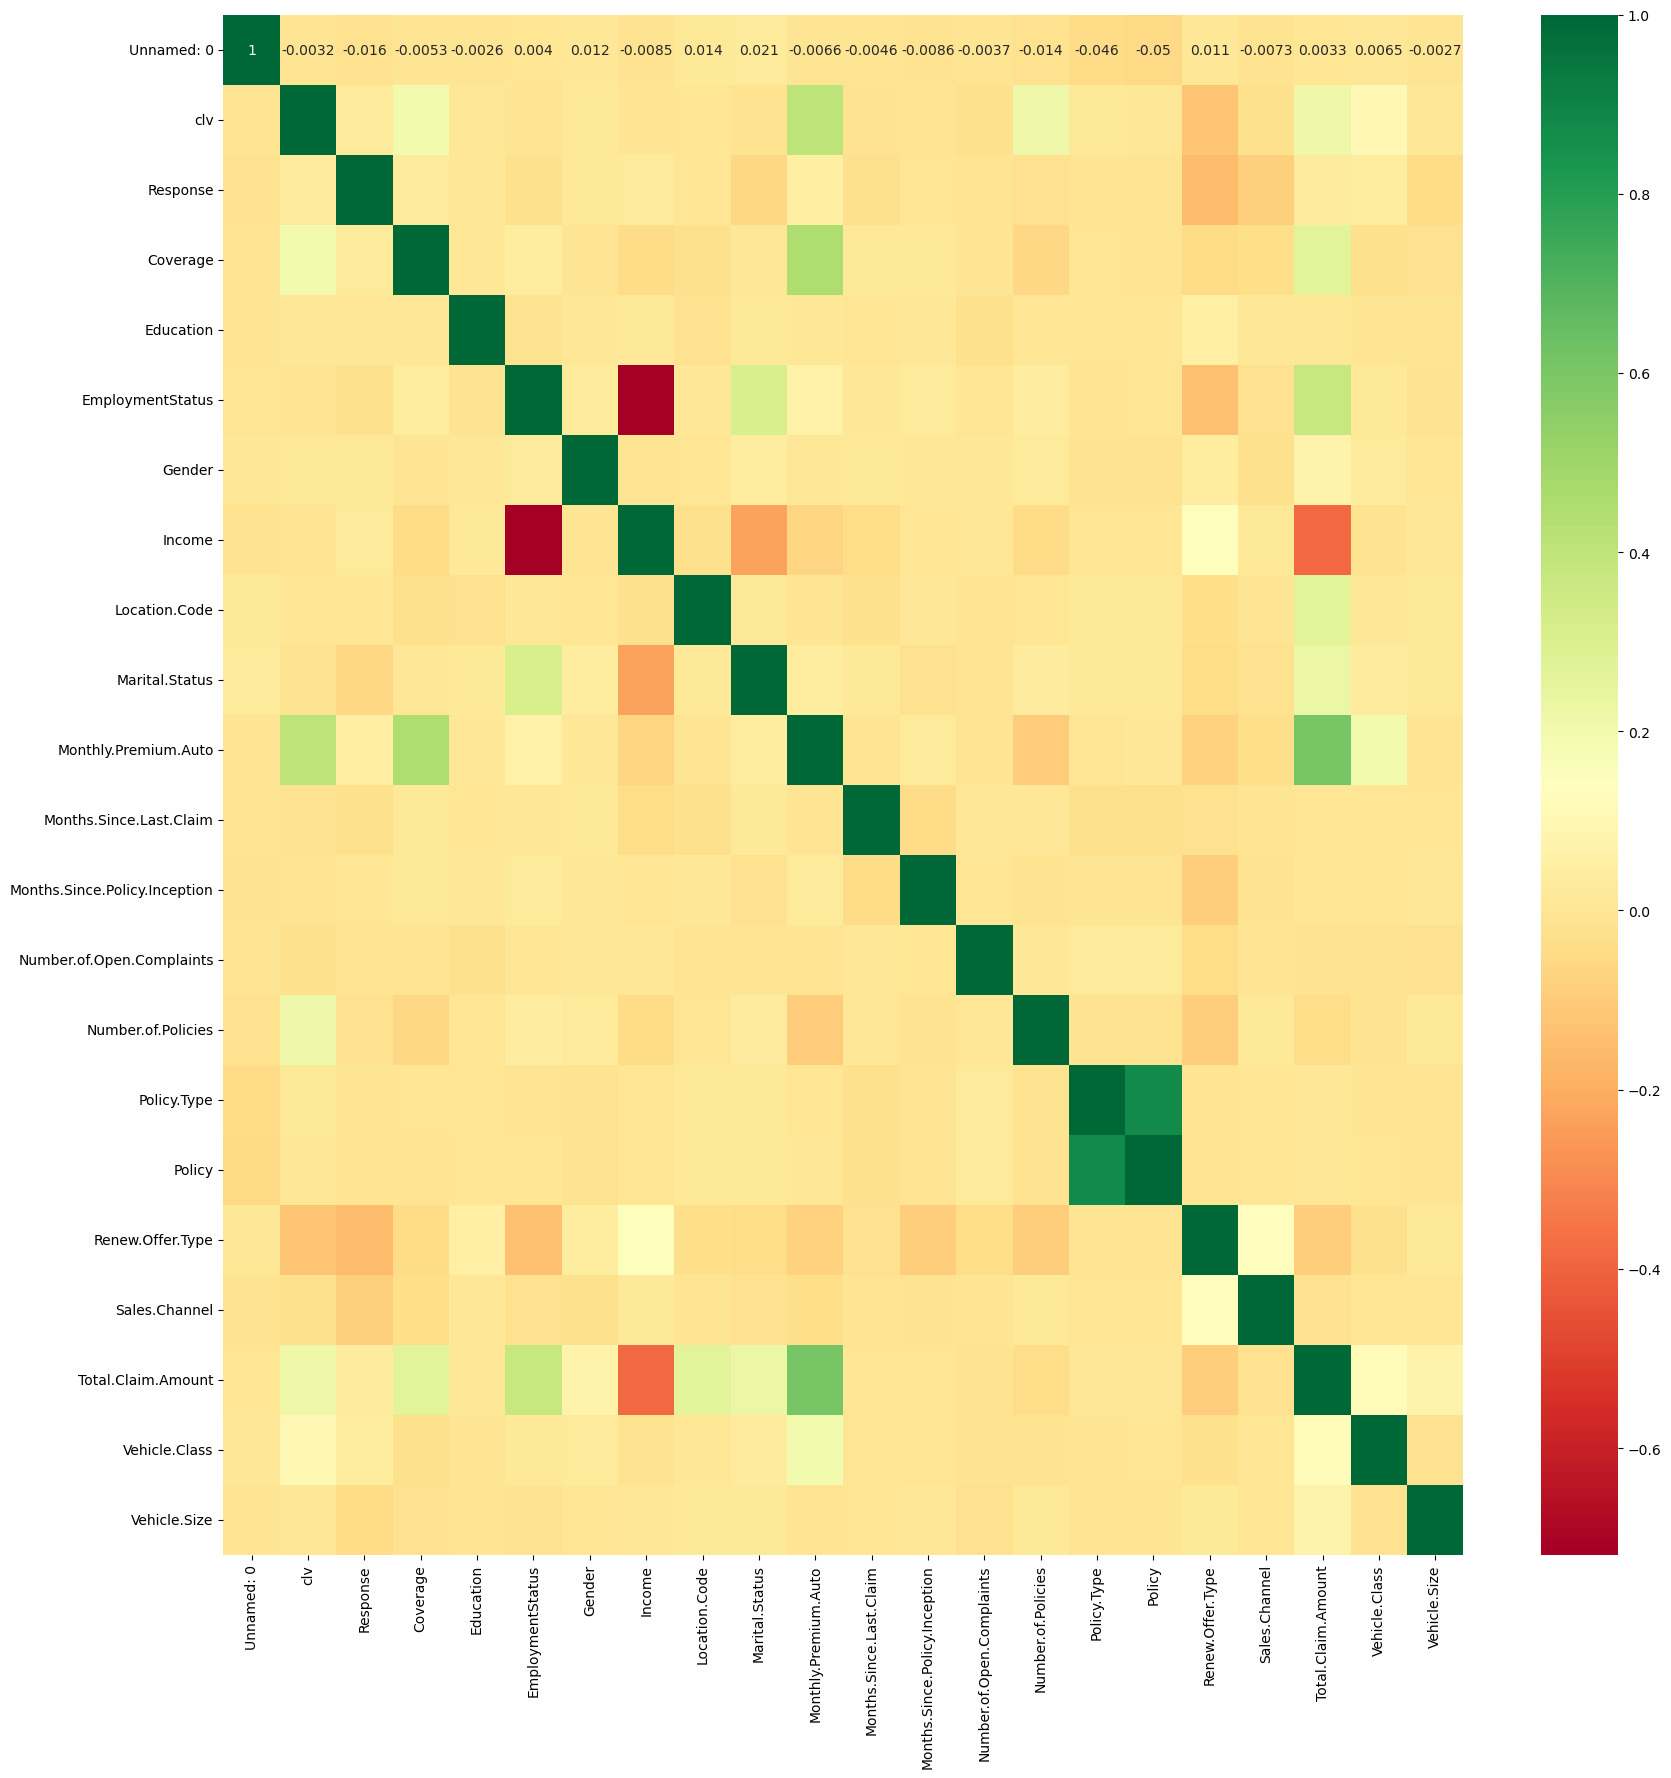

In [13]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Features selection and recognizing the target(label)

### We selected features based on VIF and correlation coefficients

In [14]:
X = df[['Coverage','Monthly.Premium.Auto','Number.of.Policies','Renew.Offer.Type','Total.Claim.Amount','Vehicle.Class']]

y = df['clv']

## Log transformation and normalization

In [15]:
drake= np.log(X+1)

In [16]:
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
scalar.fit(drake) 
scaled_data = scalar.transform(drake) 

In [17]:
kiki = np.log(y)

In [18]:
scaled_data = pd.DataFrame(data=scaled_data, columns=['Coverage', 'Monthly.Premium.Auto', 'Number.of.Policies',
       'Renew.Offer.Type', 'Total.Claim.Amount', 'Vehicle.Class'])

## Test train split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data , kiki, test_size=0.3, random_state=200)

## Applying different regression techniques

### Linear regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
print('Training accuracy=',lm.score(X_train,y_train)*100)

Training accuracy= 38.49004520519345


In [25]:
pred = lm.predict(X_test)

In [26]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Prediction accuracy =',metrics.explained_variance_score(y_test, pred)*100)

Prediction accuracy = 40.23383956080414


In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.29047073348793256
MSE: 0.13108797940600547
RMSE: 0.3620607399401452


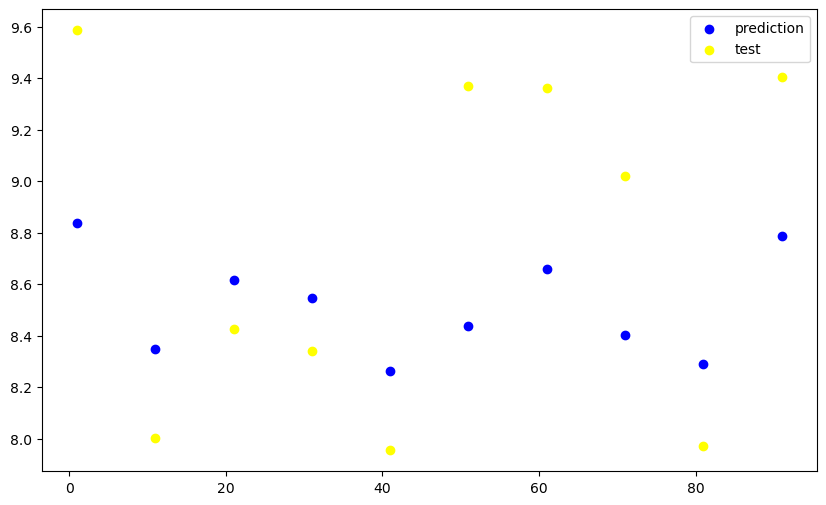

In [28]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),pred[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),y_test[0:100:10],color='yellow')

plt.legend(['prediction','test'])

In [29]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])
cdf

,coeff
Coverage,0.003024
Monthly.Premium.Auto,0.208378
Number.of.Policies,0.216943
Renew.Offer.Type,-0.025572
Total.Claim.Amount,-0.006620
Vehicle.Class,-0.000231


## Polynomial Regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(scaled_data.iloc[:,0].values.reshape(-1,1)) 
  

lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression()

In [31]:
X_poly.shape

(7639, 4)

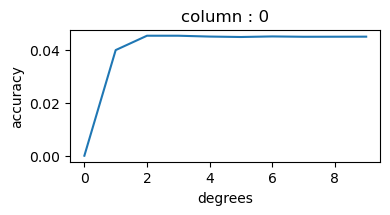

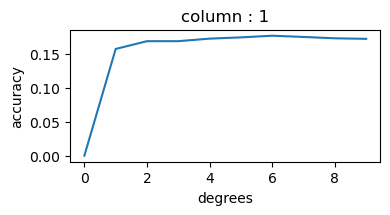

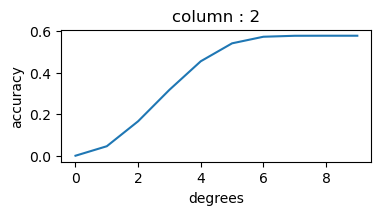

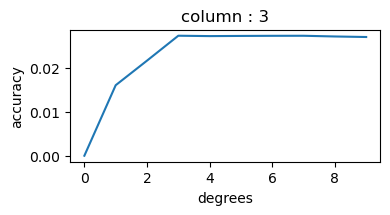

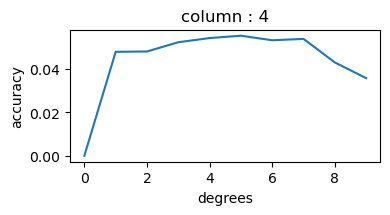

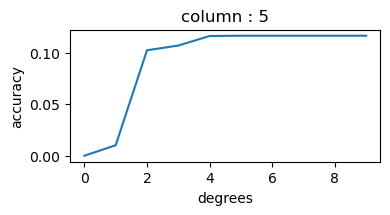

In [32]:
from sklearn.preprocessing import PolynomialFeatures 

def check_exp(inp,degree,out):
    
    poly = PolynomialFeatures(degree = degree) 
    X_poly = poly.fit_transform(inp) 


    lin2 = LinearRegression() 
    lin2.fit(X_poly, out)
    
    return lin2.score(X_poly, out)

for a in range(X.shape[1]):
    acc= []
    for i in range(10):
        acc.append(check_exp(X.iloc[:,a].values.reshape(-1,1), i, y))

    import matplotlib.pyplot as plt
    plt.figure(figsize=(4,X.shape[1]*2))
    sb = (X.shape[1]*10+1)*10+(a+1)
    plt.subplot(sb)
    plt.title('column : '+str(a))
    plt.xlabel('degrees')
    plt.ylabel('accuracy')
    plt.plot(acc)

In [33]:
poly=PolynomialFeatures(degree=1)
X_poly= poly.fit_transform(X.iloc[:,0].values.reshape(-1,1))  #0

In [34]:
poly=PolynomialFeatures(degree=1)
X_poly1= poly.fit_transform(X.iloc[:,1].values.reshape(-1,1))  #1

In [35]:
poly=PolynomialFeatures(degree=4)
X_poly2= poly.fit_transform(X.iloc[:,2].values.reshape(-1,1))  #2

In [36]:
poly=PolynomialFeatures(degree=2)
X_poly3= poly.fit_transform(X.iloc[:,3].values.reshape(-1,1))  #3

In [37]:
poly=PolynomialFeatures(degree=1)
X_poly4= poly.fit_transform(X.iloc[:,4].values.reshape(-1,1))  #4

In [38]:
poly=PolynomialFeatures(degree=2)
X_poly5= poly.fit_transform(X.iloc[:,5].values.reshape(-1,1))  #5

In [39]:
Xo = np.concatenate((X_poly,X_poly1,X_poly2,X_poly3,X_poly4,X_poly5), axis=1)

In [40]:
Xo.shape

(7639, 17)

In [41]:
Xo

array([[ 1.,  0.,  1., ...,  1.,  5., 25.],
       [ 1.,  1.,  1., ...,  1.,  0.,  0.],
       [ 1.,  2.,  1., ...,  1.,  5., 25.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  5., 25.]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(Xo, kiki, test_size=0.33, random_state=42)

In [43]:
lm.fit(X_train,y_train)
print('Training score =',lm.score(X_train,y_train)*100,'%')

Training score = 84.0449465067606 %


In [44]:
pred = lm.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
print ('Prediction accuracy =',metrics.explained_variance_score(y_test, pred)*100,'%')

Prediction accuracy = 83.99017554361804 %


In [46]:
cdf = pd.DataFrame(lm.coef_,columns=['coeff'])
cdf

,coeff
0,0.000000e+00
1,6.789980e-02
2,2.225130e-14
3,7.227431e-03
4,7.334411e-15
5,3.554717e+00
6,-1.255252e+00
7,1.725073e-01
8,-8.085933e-03
9,-8.881784e-16


In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13968762870765508
MSE: 0.034432890644754056
RMSE: 0.18556101596174251


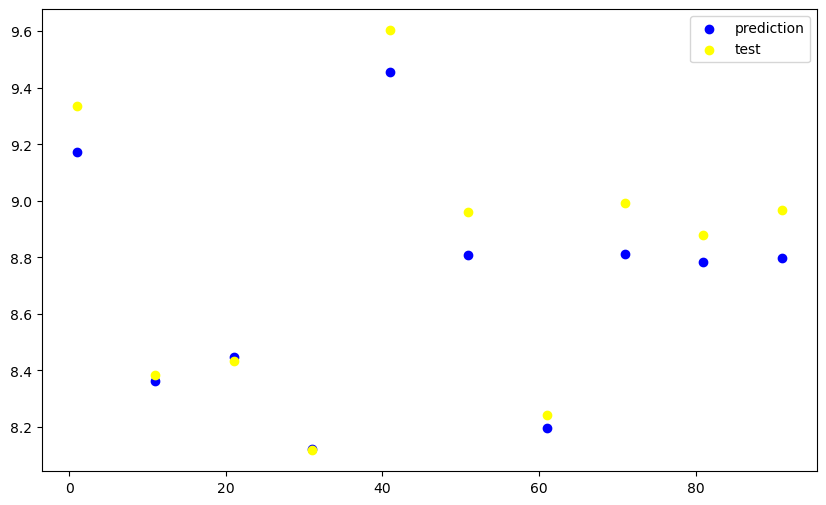

In [48]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),pred[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),y_test[0:100:10],color='yellow')

plt.legend(['prediction','test'])

## XGBoost Regressor

In [49]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, kiki, test_size=0.3, random_state=42)

In [51]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 320.0 kB/s eta 0:05:12
   ---------------------------------------- 0.1/99.8 MB 651.6 kB/s eta 0:02:33
   ---------------------------------------- 0.5/99.8 MB 2.6 MB/s eta 0:00:38
   ---------------------------------------- 0.8/99.8 MB 4.1 MB/s eta 0:00:25
   ---------------------------------------- 1.0/99.8 MB 4.0 MB/s eta 0:00:25
   ---------------------------------------- 1.2/99.8 MB 4.0 MB/s eta 0:00:25
   ---------------------------------------- 1.2/99.8 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 1.2/99.8 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 1.2/99.8 MB 2.8 MB/s eta 0:00:36
    --------------------------------------- 1.9/99.8 MB 3.9 MB/s eta 0:00:26
    --------------------------------------- 2.1/99.8 MB 4.0 MB/s eta 0:00:25
    -----

In [52]:
from xgboost import XGBRegressor

In [53]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.1)
my_model.fit(X_train, y_train, early_stopping_rounds = 5,
             eval_set=[(X_train, y_train)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
my_model.score(X_train, y_train)*100

99.32169096894242

In [55]:
pred = my_model.predict(X_test)

In [56]:
print('Prediction accuracy =',metrics.explained_variance_score(y_test, pred)*100)

Prediction accuracy = 96.39412478664737


In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.051231594615346356
MSE: 0.007794409835467751
RMSE: 0.08828595491621388


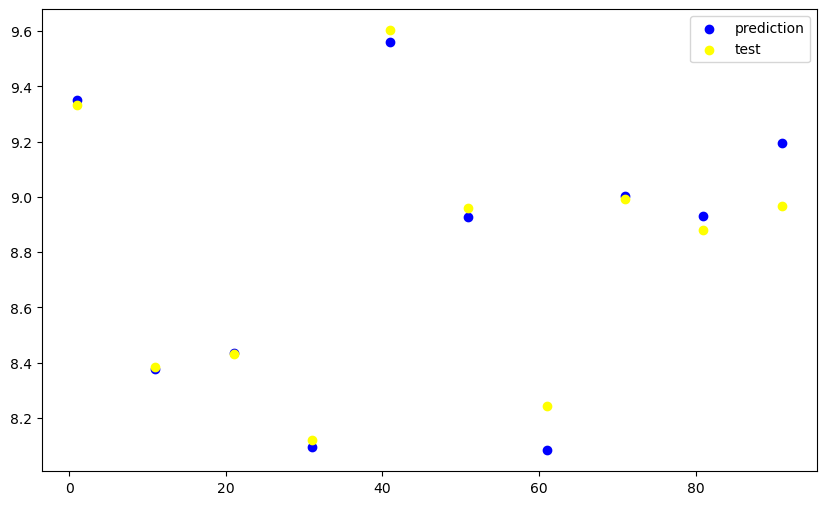

In [58]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),pred[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),y_test[0:100:10],color='yellow')

plt.legend(['prediction','test'])

## The End